In [104]:
# Loading and inspecting the data
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

whisky = pd.read_csv("whiskies.txt")
whisky["regions"] = pd.read_csv("regions.txt")
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,regions
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [105]:
"""
Different Distillery produces a different kind of whisky and therfore the no of distillery = no. of different types of whiskies in the dataset
"""
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,regions
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [106]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'regions'],
      dtype='object')

In [107]:
flavors = whisky.loc[:, 'Body':'Floral']

In [108]:
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


In [109]:
# Exploring the correlations among various Attributes of a wine
corr_flavor = pd.DataFrame.corr(flavors)
corr_flavor

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


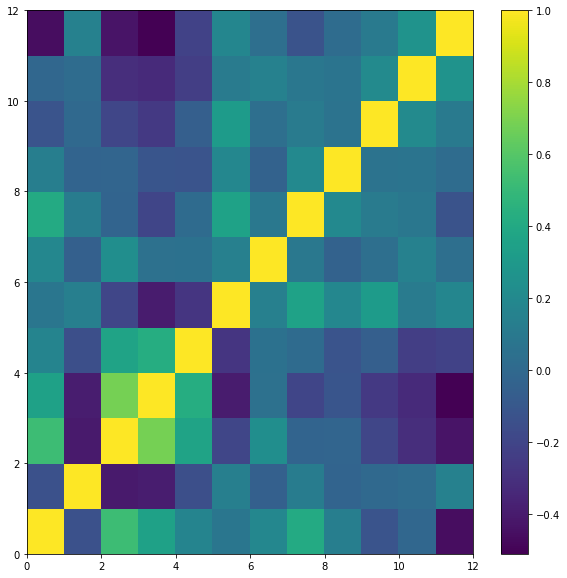

In [110]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavor)
plt.colorbar()
plt.savefig("corr_flavors.pdf")
# Note that corr with itselt is always 1 which is present in the diagonal of the corr_matrix

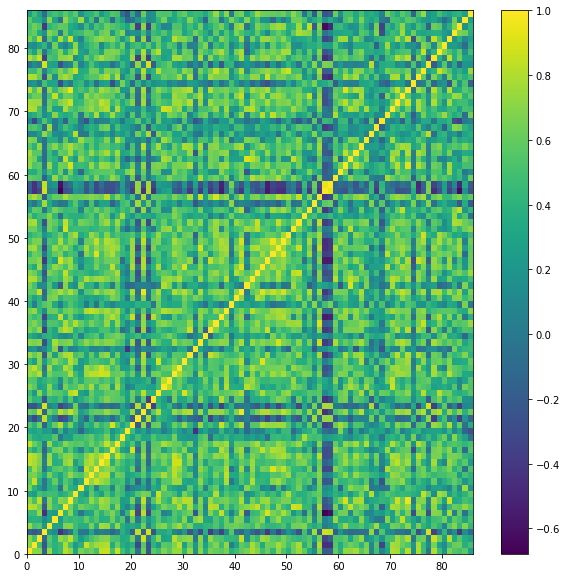

In [111]:
"""
Correlation among whiskies across different flavors
We can also look at the correlations among whiskies as corr among distilleries in terms of flavors of the whiskies that they produce
Since each row represent a whisky in terms of flavors so, we will calculate the correlation among rows(by taking the transpose)
"""
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.savefig("corr_whisky.pdf")

In [112]:
# Spectral co-clustering to cluster whiskies based on their flavor profiles
from sklearn.cluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_[:2]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, Fals

In [113]:
model.rows_.shape

(6, 86)

In [114]:
"""
each row corrsponds to a cluster and we have 6 clusters => 6 rows
86 cols => 86 diferent whiskies
if value = True => that whiisky belongs to that cluster
"""
np.sum(model.rows_, axis=1)

array([ 5, 20, 19,  6, 19, 17])

model.row_labels_

In [115]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [116]:
"""
1. add the group label column to the whisky table that we got from the clustering the data
2. Arrange rows in sorted order according to the group labels
3. Plot the clusters
4. In the latest pandas version DataFrame.ix[] is deprecated instead we'll use its replacement DataFrame.iloc[]
5. We need to reset the indices of the table to its proper order
"""
whisky['group'] = pd.Series(model.row_labels_, index=whisky.index)

whisky = whisky.iloc[np.argsort(model.row_labels_)]

whisky = whisky.reset_index(drop = True)

In [117]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,regions,group
0,40,GlenScotia,2,2,2,2,0,1,0,1,2,2,1,1,PA28 6DS,172090,621010,Campbelltown,0
1,56,Isle of Jura,2,1,2,2,0,1,1,0,2,1,1,1,PA60 7XT,152660,667040,Islands,0
2,69,OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,KW1 5BA,336730,950130,Highlands,0
3,20,Bruichladdich,1,1,2,2,0,2,2,1,2,2,2,2,PA49 7UN,126680,661400,Islay,0
4,67,Oban,2,2,2,2,0,0,2,0,2,2,2,0,PA34 5NH,185940,730190,Highlands,0


In [118]:
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,regions,group
81,50,Glenlossie,1,2,1,0,0,1,2,0,1,2,2,2,IV30 3SS,322640,861040,Speyside,5
82,51,Glenmorangie,2,2,1,1,0,1,2,0,2,1,2,2,IV19 1PZ,276750,883450,Highlands,5
83,21,Bunnahabhain,1,2,1,1,0,1,1,1,1,2,2,3,PA46 7RR,142210,673170,Islay,5
84,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands,5
85,61,Loch Lomond,1,1,1,1,0,1,1,0,1,2,1,2,G83 0TL,239370,680920,Highlands,5


In [119]:
correlations = pd.DataFrame.corr(whisky.loc[:, 'Body':'Floral'].transpose())
correlations = np.array(correlations)

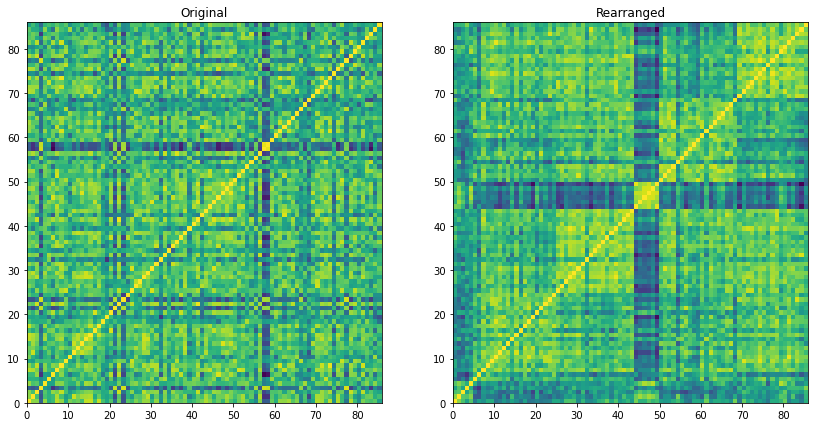

In [120]:
# Plotting the correlations matrix
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.savefig("correlations.pdf")

In [122]:
from sklearn.cluster.bicluster import SpectralCoclustering
import numpy as np
import pandas as pd
whisky = pd.read_csv("whiskies.csv", index_col=0)
correlations = pd.DataFrame.corr(whisky.loc[:, 'Body':'Floral'].transpose())

In [123]:
whisky.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15   Latitude   86 non-null     int64 
 16   Longitude  86 non-null     int64 
 17  Region      86 non-null     object
 18  Group       86 non-null     int64 
dtypes: int64(16), object(3)
memory usage: 15.9+ KB


In [124]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0


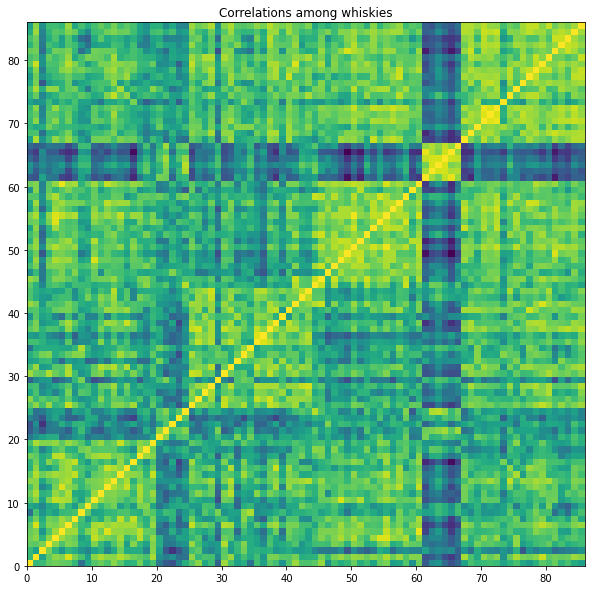

In [129]:
plt.figure(figsize=(10, 10))
plt.pcolor(correlations)
plt.title("Correlations among whiskies")
plt.savefig("correlations_2.pdf")

In [131]:
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!

from bokeh.plotting import figure, output_file, show
from itertools import product
from bokeh.models import HoverTool, ColumnDataSource

# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.
plot_values = [1, 2, 3, 4, 5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.

grid = list(product(plot_values, plot_values))
print(grid)
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4),
 (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3),
 (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
# The first value is the x coordinate, and the second value is the y coordinate.

# Let's store these in separate lists.
xs, ys = zip(*grid)
print(xs)
print(ys)
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)

# Now we will make a list of colors, alternating between red and blue.
colors = [plot_colors[i % 2] for i in range(len(grid))]
print(colors)
[
    'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue',
    'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue',
    'red', 'blue', 'red', 'blue', 'red'
]

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.
alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.
source = ColumnDataSource(data={
    "x": xs,
    "y": ys,
    "colors": colors,
    "alphas": alphas,
})

# We are ready to make our interactive Bokeh plot!

output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="hover")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors", alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
}
show(fig)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)
['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red']
